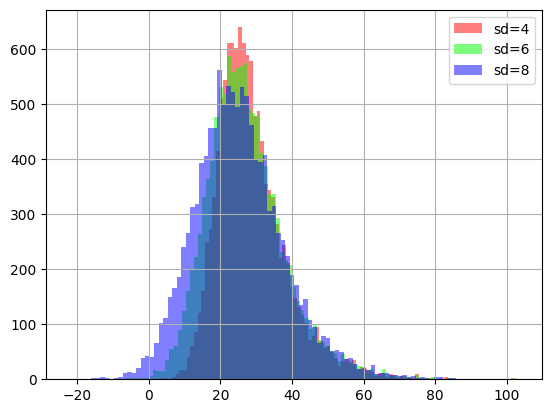

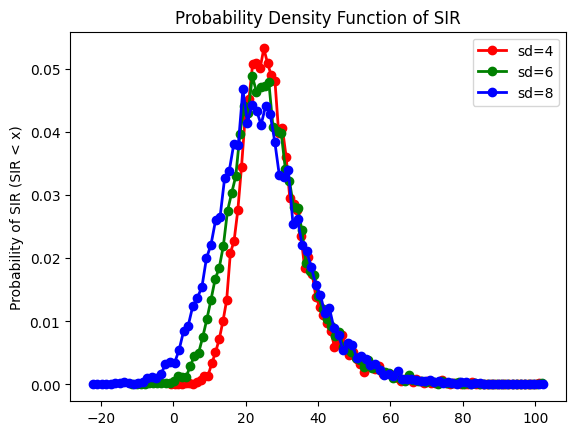

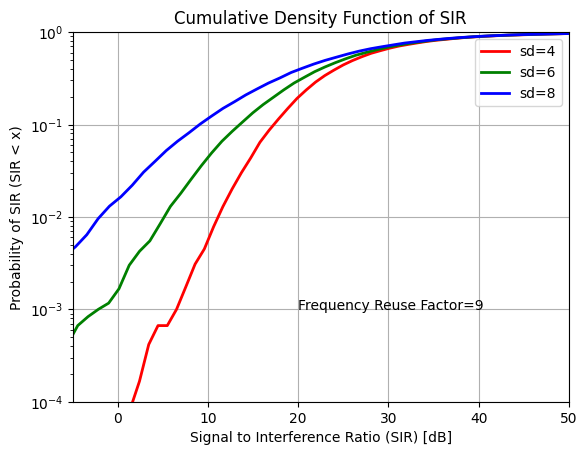

In [ ]:
# 20191581 김하연 네트워크최신기술 1 Tier TDD
import numpy as np
import matplotlib.pyplot as plt

FreqReUse=9 # 서로 다른 주파수를 사용하는 9개의 지역
NoUpLink=12 # subscriber 수
NtwSizeA=-2000 # 셀의 중심에서 경계까지 음의 거리
NtwSizeB=2000 # 셀의 중심에서 경계까지 양의 거리 - 셀의 총 크기는 4000 * 4000
PlusShift=12000 # 같은 주파수를 사용하는 위쪽 셀까지의 거리
MinusShift=-12000 # 같은 주파수를 사용하는 아래쪽 셀까지의 거리
No_Iterations=1000

SIRList = [np.zeros((1,NoUpLink)), np.zeros((1,NoUpLink)), np.zeros((1,NoUpLink))]

for Loop in range(0,No_Iterations):

    # subsciriber들의 각 셀마다 중심까지의 거리 랜덤 지정 (-2000~2000 사이의 값)
    SubX = np.random.uniform(NtwSizeA, NtwSizeB, size=[FreqReUse, NoUpLink])
    SubY = np.random.uniform(NtwSizeA, NtwSizeB, size=[FreqReUse, NoUpLink])

    # 원점(0,0) 기준으로 한 위치 계산
    Cell_x0 = SubX[0, :] # 셀의 중심이 원점
    Cell_y0 = SubY[0, :]
    Cell_x1 = SubX[1, :] # 0번 셀과 같은 주파수를 사용하는 위 셀
    Cell_y1 = SubY[1, :] + PlusShift
    Cell_x2 = SubX[2, :] + PlusShift # 0번 셀과 같은 주파수를 사용하는 오른쪽 위 셀
    Cell_y2 = SubY[2, :] + PlusShift
    Cell_x3 = SubX[3, :] + PlusShift # 0번 셀과 같은 주파수를 사용하는 오른쪽 셀
    Cell_y3 = SubY[3, :]
    Cell_x4 = SubX[4, :] + PlusShift # 0번 셀과 같은 주파수를 사용하는 오른쪽 아래 셀
    Cell_y4 = SubY[4, :] + MinusShift
    Cell_x5 = SubX[5, :] # 0번 셀과 같은 주파수를 사용하는 아래 셀
    Cell_y5 = SubY[5, :] + MinusShift
    Cell_x6 = SubX[6, :] + MinusShift # 0번 셀과 같은 주파수를 사용하는 왼쪽 아래 셀
    Cell_y6 = SubY[6, :] + MinusShift
    Cell_x7 = SubX[7, :] + MinusShift # 0번 셀과 같은 주파수를 사용하는 왼쪽 셀
    Cell_y7 = SubY[7, :]
    Cell_x8 = SubX[8, :] + MinusShift # 0번 셀과 같은 주파수를 사용하는 왼쪽 위 셀
    Cell_y8 = SubY[8, :] + PlusShift

    # 셀 결과들을 하나의 행렬로 구성 -> row 9 col 12
    ShiftX = np.array([Cell_x0, Cell_x1, Cell_x2, Cell_x3, Cell_x4, Cell_x5,
                        Cell_x6, Cell_x7, Cell_x8])
    ShiftY = np.array([Cell_y0, Cell_y1, Cell_y2, Cell_y3, Cell_y4, Cell_y5,
                        Cell_y6, Cell_y7, Cell_y8])

    # 원점으로부터 각 subscriber 들의 거리 계산 -> row 9 col 12
    Dist = np.sqrt(ShiftX**2+ ShiftY**2)

    # power 모델링
    NormalDistribution = np.random.randn(FreqReUse, NoUpLink)
    mu = 0

    SDList = [4, 6, 8]

    for i in range(0, len(SDList)):
      # SD = 4, 6, 8을 각각 사용해 base station에서 받은 power 계산
      LogNormal = mu+SDList[i]*NormalDistribution
      # LogNormalP = subscriber가 1의 power를 보냈을 때 base station에 도달한 power => multi path 중첩 현상으로 power가 1 이상 또는 1 이하의 값을 가질 수 있다!!
      LogNormalP = 10**(LogNormal/10)/(Dist**4)

      # SIR 계산
      PS = LogNormalP[0, :]
      PI1 = LogNormalP[1, :]
      PI2 = LogNormalP[2, :]
      PI3 = LogNormalP[3, :]
      PI4 = LogNormalP[4, :]
      PI5 = LogNormalP[5, :]
      PI6 = LogNormalP[6, :]
      PI7 = LogNormalP[7, :]
      PI8 = LogNormalP[8, :]

      PI = PI1+PI2+PI3+PI4+PI5+PI6+PI7+PI8 # 8개의 cell에서 간섭을 각 유저 별로 받음
      SIRn = PS/PI  # signal  / interference = 원하는 1명의 거 / 8개의 간섭
      SIRdB = 10*np.log10(SIRn) # dB 단위로 변환
      # 결과 축적
      SIRList[i] = np.vstack((SIRList[i], SIRdB))


for i in range(0, len(SIRList)):
  # 각 sd 마다 SIR 행렬 정리
  SIRList[i]=np.delete(SIRList[i], 0,0)
  SIRList[i]=SIRList[i].flatten()


plt.figure(2)
hist_4, bin_left_4, patch_4=plt.hist(SIRList[0], bins=100, fc=(1,0,0,0.5), label="sd=4")
hist_6, bin_left_6, patch_6=plt.hist(SIRList[1], bins=100, fc=(0,1,0,0.5), label="sd=6")
hist_8, bin_left_8, patch_8=plt.hist(SIRList[2], bins=100, fc=(0,0,1,0.5), label="sd=8")
plt.legend()
plt.grid()

# 확률 밀도 함수(probability density function)
pdf_4=hist_4/np.size(SIRList[0])
pdf_6=hist_6/np.size(SIRList[1])
pdf_8=hist_8/np.size(SIRList[2])
plt.figure(3)
plt.plot(bin_left_4[:-1], pdf_4, 'ro-', lw=2, label="sd=4")
plt.plot(bin_left_6[:-1], pdf_6, 'go-', lw=2, label="sd=6")
plt.plot(bin_left_8[:-1], pdf_8, 'bo-', lw=2, label="sd=8")
plt.ylabel('Probability of SIR (SIR < x)')
plt.title('Probability Density Function of SIR')
plt.legend()

# 누적 확률 밀도 함수(cumulative density function)
cdf_4=np.cumsum(pdf_4)
cdf_6=np.cumsum(pdf_6)
cdf_8=np.cumsum(pdf_8)

plt.figure(4)
plt.semilogy(bin_left_4[:-1], cdf_4, color='r', lw=2, label="sd=4")
plt.semilogy(bin_left_6[:-1], cdf_6, color='g', lw=2, label="sd=6")
plt.semilogy(bin_left_8[:-1], cdf_8, color='b', lw=2, label="sd=8")
plt.xlabel('Signal to Interference Ratio (SIR) [dB]')
plt.ylabel('Probability of SIR (SIR < x)')
plt.title('Cumulative Density Function of SIR')
plt.text(20, 1e-3, r'Frequency Reuse Factor=9')
plt.axis([-5, 50, 1e-4, 1])
plt.grid(True)
plt.legend()
plt.show()